In [1]:
import requests
import csv
import json
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.ticker as mticker
import mplfinance as fplt
 
import key1



In [2]:
key = key1.key()
company = 'twtr'
outputsize = 'compact'
response = requests.get(f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={company}&outputsize={outputsize}&apikey={key}')

res = json.loads(response.text)
df = pd.DataFrame(res)


In [3]:
df

,Meta Data,Time Series (Daily)
1. Information,Daily Time Series with Splits and Dividend Events,NaN
2. Symbol,twtr,NaN
3. Last Refreshed,2020-10-19,NaN
4. Output Size,Compact,NaN
5. Time Zone,US/Eastern,NaN
...,...,...
2020-06-04,NaN,"{'1. open': '34.5000', '2. high': '34.9400', '..."
2020-06-03,NaN,"{'1. open': '32.6100', '2. high': '35.0400', '..."
2020-06-02,NaN,"{'1. open': '32.1900', '2. high': '32.4250', '..."
2020-06-01,NaN,"{'1. open': '31.0600', '2. high': '32.1000', '..."


In [4]:
df.head(10)

,Meta Data,Time Series (Daily)
1. Information,Daily Time Series with Splits and Dividend Events,NaN
2. Symbol,twtr,NaN
3. Last Refreshed,2020-10-19,NaN
4. Output Size,Compact,NaN
5. Time Zone,US/Eastern,NaN
2020-10-19,NaN,"{'1. open': '46.0500', '2. high': '46.3000', '..."
2020-10-16,NaN,"{'1. open': '46.3600', '2. high': '46.4500', '..."
2020-10-15,NaN,"{'1. open': '45.0600', '2. high': '46.0850', '..."
2020-10-14,NaN,"{'1. open': '47.4900', '2. high': '47.7000', '..."
2020-10-13,NaN,"{'1. open': '48.2800', '2. high': '48.3200', '..."


In [5]:
df.dropna(axis='index', how ='all', subset=['Time Series (Daily)'], inplace=True)
df

,Meta Data,Time Series (Daily)
2020-10-19,NaN,"{'1. open': '46.0500', '2. high': '46.3000', '..."
2020-10-16,NaN,"{'1. open': '46.3600', '2. high': '46.4500', '..."
2020-10-15,NaN,"{'1. open': '45.0600', '2. high': '46.0850', '..."
2020-10-14,NaN,"{'1. open': '47.4900', '2. high': '47.7000', '..."
2020-10-13,NaN,"{'1. open': '48.2800', '2. high': '48.3200', '..."
...,...,...
2020-06-04,NaN,"{'1. open': '34.5000', '2. high': '34.9400', '..."
2020-06-03,NaN,"{'1. open': '32.6100', '2. high': '35.0400', '..."
2020-06-02,NaN,"{'1. open': '32.1900', '2. high': '32.4250', '..."
2020-06-01,NaN,"{'1. open': '31.0600', '2. high': '32.1000', '..."


In [6]:
df.index.rename('Date', inplace=True)
df.dropna(axis='columns', how='all', inplace=True)


In [7]:
df.loc['2020-09-15']['Time Series (Daily)']

{'1. open': '39.1900',
 '2. high': '39.3000',
 '3. low': '38.2250',
 '4. close': '39.0900',
 '5. adjusted close': '39.0900',
 '6. volume': '14104996',
 '7. dividend amount': '0.0000',
 '8. split coefficient': '1.0'}

In [8]:
df['Open'] = (df['Time Series (Daily)'].apply(lambda x: x.get('1. open', 0))).astype(float)
df['High'] = (df['Time Series (Daily)'].apply(lambda x: x.get('2. high', 0))).astype(float)
df['Low'] = (df['Time Series (Daily)'].apply(lambda x: x.get('3. low', 0))).astype(float)
df['Close'] = (df['Time Series (Daily)'].apply(lambda x: x.get('4. close', 0))).astype(float)
df['adjusted close'] = (df['Time Series (Daily)'].apply(lambda x: x.get('5. adjusted close', 0))).astype(float)
df['Volume'] = (df['Time Series (Daily)'].apply(lambda x: x.get('6. volume', 0))).astype(float)
df['dividend amount'] = (df['Time Series (Daily)'].apply(lambda x: x.get('7. dividend amount', 0))).astype(float)
df['split coefficient'] = (df['Time Series (Daily)'].apply(lambda x: x.get('8. split coefficient', 0))).astype(float)
df


,Time Series (Daily),Open,High,Low,Close,adjusted close,Volume,dividend amount,split coefficient
Date,,,,,,,,,
2020-10-19,"{'1. open': '46.0500', '2. high': '46.3000', '...",46.05,46.300,45.2448,45.82,45.82,9870727.0,0.0,1.0
2020-10-16,"{'1. open': '46.3600', '2. high': '46.4500', '...",46.36,46.450,45.0530,45.81,45.81,13009817.0,0.0,1.0
2020-10-15,"{'1. open': '45.0600', '2. high': '46.0850', '...",45.06,46.085,44.3000,46.03,46.03,19823809.0,0.0,1.0
2020-10-14,"{'1. open': '47.4900', '2. high': '47.7000', '...",47.49,47.700,45.6199,45.98,45.98,14455025.0,0.0,1.0
2020-10-13,"{'1. open': '48.2800', '2. high': '48.3200', '...",48.28,48.320,46.9900,47.00,47.00,9805899.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-06-04,"{'1. open': '34.5000', '2. high': '34.9400', '...",34.50,34.940,33.3400,33.72,33.72,20187672.0,0.0,1.0
2020-06-03,"{'1. open': '32.6100', '2. high': '35.0400', '...",32.61,35.040,32.4400,34.88,34.88,28375558.0,0.0,1.0
2020-06-02,"{'1. open': '32.1900', '2. high': '32.4250', '...",32.19,32.425,31.6100,32.26,32.26,15298919.0,0.0,1.0


In [9]:
df.drop(columns=['Time Series (Daily)'], inplace=True)


In [10]:
df.index = pd.to_datetime(df.index)
df.index


DatetimeIndex(['2020-10-19', '2020-10-16', '2020-10-15', '2020-10-14',
               '2020-10-13', '2020-10-12', '2020-10-09', '2020-10-08',
               '2020-10-07', '2020-10-06', '2020-10-05', '2020-10-02',
               '2020-10-01', '2020-09-30', '2020-09-29', '2020-09-28',
               '2020-09-25', '2020-09-24', '2020-09-23', '2020-09-22',
               '2020-09-21', '2020-09-18', '2020-09-17', '2020-09-16',
               '2020-09-15', '2020-09-14', '2020-09-11', '2020-09-10',
               '2020-09-09', '2020-09-08', '2020-09-04', '2020-09-03',
               '2020-09-02', '2020-09-01', '2020-08-31', '2020-08-28',
               '2020-08-27', '2020-08-26', '2020-08-25', '2020-08-24',
               '2020-08-21', '2020-08-20', '2020-08-19', '2020-08-18',
               '2020-08-17', '2020-08-14', '2020-08-13', '2020-08-12',
               '2020-08-11', '2020-08-10', '2020-08-07', '2020-08-06',
               '2020-08-05', '2020-08-04', '2020-08-03', '2020-07-31',
      

In [11]:
starting_point = df.loc['2020-07-07']['Close'].min()
starting_point
buying_date = df.loc['2020-07-07'].index

Text(0, 0.5, 'Price (USD)')

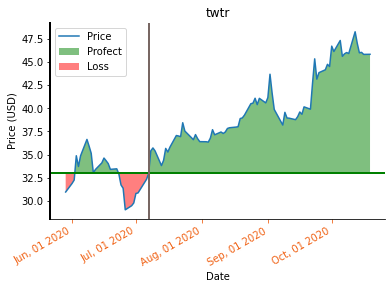

In [12]:
# ploting
fig = plt.figure()
ax=plt.subplot2grid((1,1), (0,0))
ax.fill_between(df.index, df['Close'], starting_point,
            where=(df['Close'] > starting_point),
            alpha=0.5, facecolor='g',
            interpolate=True,
            label='Profect'
             )

ax.fill_between(df.index, df['Close'], starting_point,
            where=(df['Close'] < starting_point),
            alpha=0.5, facecolor='r',
            interpolate=True,
            label='Loss'
             )


ax.plot_date(df.index, df['Close'], '-', label='Price')


for label in ax.xaxis.get_ticklabels():
    label.set_rotation(30)
date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

ax.axhline(starting_point, color='g', linewidth=2)
ax.axvline(buying_date, color = '#786763', linewidth = 2)

ax.spines['left'].set_color('k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)

ax.tick_params(axis='x', colors='#f06215')


# ax.grid(True)#, color='g')
plt.title(company)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price (USD)')

In [13]:
df1 = df
df1.drop(columns=['dividend amount'], inplace=True)
df1.drop(columns=['split coefficient'], inplace=True)
df1.drop(columns=['adjusted close'], inplace=True)
df1

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-19,46.05,46.300,45.2448,45.82,9870727.0
2020-10-16,46.36,46.450,45.0530,45.81,13009817.0
2020-10-15,45.06,46.085,44.3000,46.03,19823809.0
2020-10-14,47.49,47.700,45.6199,45.98,14455025.0
2020-10-13,48.28,48.320,46.9900,47.00,9805899.0
...,...,...,...,...,...
2020-06-04,34.50,34.940,33.3400,33.72,20187672.0
2020-06-03,32.61,35.040,32.4400,34.88,28375558.0
2020-06-02,32.19,32.425,31.6100,32.26,15298919.0


In [14]:
df1 = df1.iloc[: : -1]

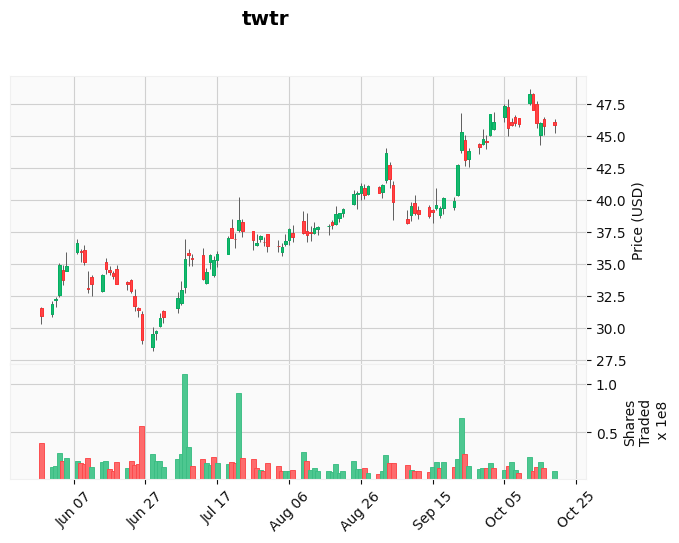

In [20]:
# candle ploting

fplt.plot(df1, type = 'candle', title = company, ylabel ='Price (USD)', style = 'yahoo', ylabel_lower = 'Shares\nTraded', show_nontrading =True,     volume=True)
# style = classic, charles, mike, 

In [16]:
fplt.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

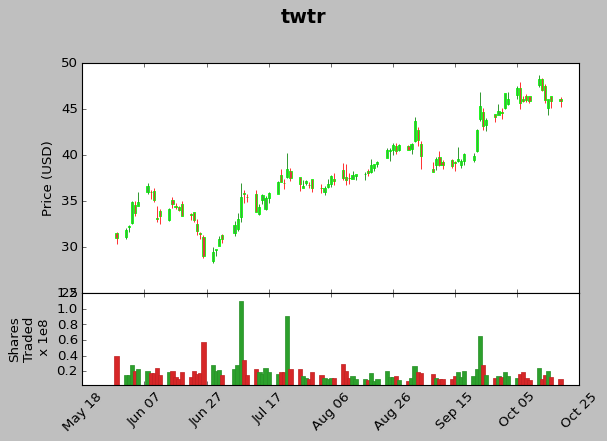

In [40]:
mc = fplt.make_marketcolors(
    up = 'tab:green', down = 'tab:red',
    edge = 'lime',
    wick = {'up': 'green', 'down':'red'},
    volume = 'inherit'
)
s = fplt.make_mpf_style(base_mpl_style = 'classic', marketcolors = mc)
fplt.plot(
    df1, type = 'candle',
    title =company, ylabel = 'Price (USD)',
    figratio =(12, 8),
    volume =True,
    ylabel_lower ='Shares\nTraded',
    show_nontrading = True,
    style =s
)

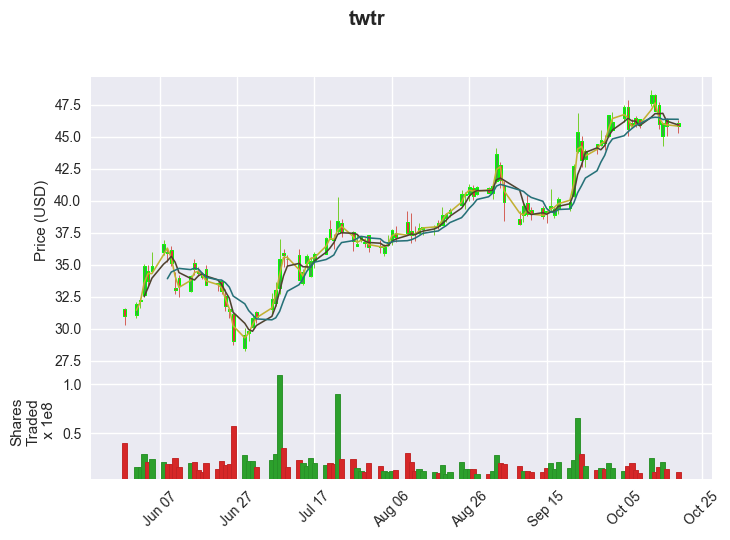

In [46]:
mc = fplt.make_marketcolors(
    up = 'tab:green', down = 'tab:red',
    edge = 'lime',
    wick = {'up': '#76cf2d', 'down':'#d46159'},
    volume = 'inherit'
    
)
s = fplt.make_mpf_style(base_mpl_style = 'seaborn', marketcolors = mc,
        mavcolors= ['#c2b032', '#4f422f', '#267178'])
fplt.plot(
    df1, type = 'candle',
    title =company, ylabel = 'Price (USD)',
    figratio =(12, 8),
    volume =True,
    mav = (2, 4, 8),
    ylabel_lower ='Shares\nTraded',
    show_nontrading = True,
    style =s
)